In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from anomalib.pre_processing.transforms import Denormalize
from anomalib.pre_processing import get_transforms
from anomalib.data import InferenceDataset
from torch.utils.data import DataLoader

In [2]:
from pytorch_lightning import Trainer, seed_everything
from anomalib.config import get_configurable_parameters
from anomalib.models import get_model
from anomalib.utils.callbacks import get_callbacks

In [3]:
model_name="dfkde"
config_path="anomalib/models/dfkde/config.yaml"
weight_file="results/dfkde/Driving/run/weights/model.ckpt"

config = get_configurable_parameters(
    model_name=model_name,
    config_path=config_path,
    weight_file=weight_file,
)

/home/ec2-user/SageMaker/Image-Anomaly/anomalib/anomalib/config/config.py:276: UserWarning: config.project.unique_dir is set to False. This does not ensure that your results will be written in an empty directory and you may overwrite files.
  "config.project.unique_dir is set to False. "


In [4]:
if config.project.seed:
    seed_everything(config.project.seed)
model = get_model(config)
callbacks = get_callbacks(config)
trainer = Trainer(callbacks=callbacks, **config.trainer)

Global seed set to 42
/home/ec2-user/anaconda3/envs/amazonei_pytorch_latest_p37/lib/python3.7/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `PrecisionRecallCurve` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
FeatureExtractor is deprecated. Use TimmFeatureExtractor instead. Both FeatureExtractor and TimmFeatureExtractor will be removed in version 2023.1
/home/ec2-user/SageMaker/Image-Anomaly/anomalib/anomalib/utils/callbacks/__init__.py:142: UserWarning: Export option: None not found. Defaulting to no model export
  warnings.warn(f"Export option: {config.optimization.export_mode} not found. Defaulting to no model export")
/home/ec2-user/anaconda3/envs/amazonei_pytorch_latest_p37/lib/python3.7/site-packages/pytorch_lightning/trainer/connectors/checkpoint_connector.py:52: LightningDeprecationWarning: Setting `Trainer(resume_from_checkpoint=)` is deprecated in v1.5 and 

In [5]:
config

{'dataset': {'name': 'Driving', 'format': 'folder', 'path': '/home/ec2-user/SageMaker/AnamolyData', 'normal_dir': 'train/images/normal/', 'abnormal_dir': 'val/images/anamoly', 'normal_test_dir': 'val/images/normal', 'mask': None, 'task': 'classification', 'extensions': None, 'image_size': [256, 256], 'train_batch_size': 32, 'test_batch_size': 8, 'num_workers': 8, 'normalization': 'imagenet', 'val_split_mode': 'same_as_test', 'test_split_mode': 'from_dir', 'test_split_ratio': 1, 'val_split_ratio': 1, 'transform_config': {'train': None, 'val': None, 'eval': None}, 'create_validation_set': False, 'tiling': {'apply': False, 'tile_size': None, 'stride': None, 'remove_border_count': 0, 'use_random_tiling': False, 'random_tile_count': 16}, 'eval_batch_size': 8, 'mask_dir': None, 'root': '/home/ec2-user/SageMaker/AnamolyData'}, 'model': {'name': 'dfkde', 'backbone': 'resnet18', 'layers': ['layer4'], 'pre_trained': True, 'n_pca_components': 16, 'max_training_points': 40000, 'feature_scaling_met

In [6]:
transforms=get_transforms(image_size=(256, 256))

Transform configs has not been provided. Images will be normalized using ImageNet statistics.


In [7]:
inference_dataset = InferenceDataset(path="/home/ec2-user/SageMaker/AnamolyData/val/images/normal",transform=transforms)
inference_dataloader = DataLoader(dataset=inference_dataset)

In [8]:
predictions = trainer.predict(model=model, dataloaders=inference_dataloader)

/home/ec2-user/anaconda3/envs/amazonei_pytorch_latest_p37/lib/python3.7/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `ROC` will save all targets and predictions in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/ec2-user/anaconda3/envs/amazonei_pytorch_latest_p37/lib/python3.7/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:245: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  category=PossibleUserWarning,


Predicting: 0it [00:00, ?it/s]

In [9]:
wrong=0
for item in predictions:
    print(item["pred_scores"],item["pred_labels"])
    wrong+=item["pred_labels"]==True
    
print(f"wrong false positive predictions are {wrong}")

tensor([0.3725]) tensor([False])
tensor([0.2622]) tensor([False])
tensor([0.2504]) tensor([False])
tensor([0.5368]) tensor([True])
tensor([0.4266]) tensor([False])
tensor([0.3281]) tensor([False])
tensor([0.4463]) tensor([False])
tensor([0.3792]) tensor([False])
tensor([0.2253]) tensor([False])
tensor([0.3930]) tensor([False])
tensor([0.2409]) tensor([False])
tensor([0.2706]) tensor([False])
tensor([0.3168]) tensor([False])
tensor([0.2600]) tensor([False])
tensor([0.2215]) tensor([False])
tensor([0.3078]) tensor([False])
tensor([0.3856]) tensor([False])
tensor([0.2761]) tensor([False])
tensor([0.2167]) tensor([False])
tensor([0.3159]) tensor([False])
tensor([0.2579]) tensor([False])
tensor([0.2955]) tensor([False])
tensor([0.3172]) tensor([False])
tensor([0.3717]) tensor([False])
tensor([0.4148]) tensor([False])
tensor([0.3832]) tensor([False])
tensor([0.3728]) tensor([False])
tensor([0.3353]) tensor([False])
tensor([0.2565]) tensor([False])
tensor([0.2705]) tensor([False])
tensor([0.3

In [10]:
inference_dataset = InferenceDataset(path="/home/ec2-user/SageMaker/AnamolyData/val/images/anamoly", image_size=(256, 256))
inference_dataloader = DataLoader(dataset=inference_dataset)

In [11]:
predictions = trainer.predict(model=model, dataloaders=inference_dataloader)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

/home/ec2-user/SageMaker/Image-Anomaly/anomalib/anomalib/pre_processing/transforms/custom.py:24: UserWarning: Denormalize is no longer used and will be deprecated in v0.4.0
  warnings.warn("Denormalize is no longer used and will be deprecated in v0.4.0")


tensor([0.4202]) tensor([False])
tensor([0.5000]) tensor([False])
wrong false negatives predictions are tensor([2])


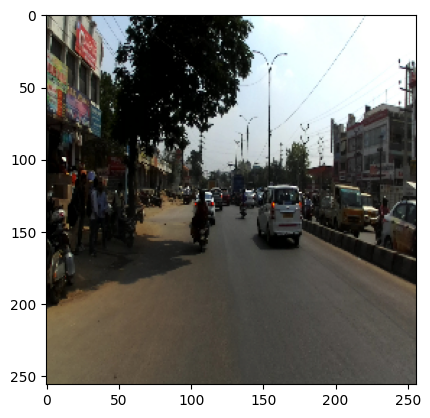

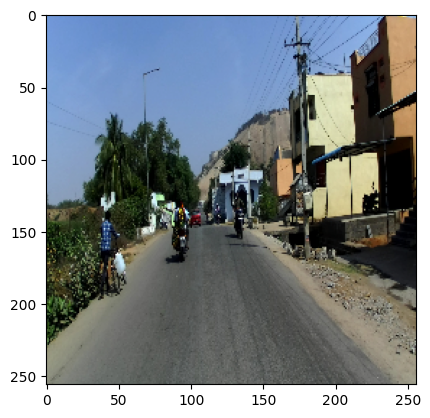

In [12]:
wrong=0
for i,item in enumerate(predictions):
    wrong+=item["pred_labels"]==False
    if item["pred_labels"]==False:
        image = item["image"][0]
        image = Denormalize()(image)
        plt.figure(i+1)
        plt.imshow(image)
        print(item["pred_scores"],item["pred_labels"])
        
print(f"wrong false negatives predictions are {wrong}")